# Sequence Analysis

## Dotplot

**You have these two nucleotide sequences:
S1: = "AGTTGT" and	 S2:= "AGTTTGG".
Make a dotplot for these two sequences and use a windowsize of 2.**

In [7]:
# Load modules
import numpy as np
import pylab as pl

# Define sequnces
seq_1 = "AGTTGT"
seq_2 = "AGTTTGG"

x = []
y = []

# With window =2, two nucleotides vs two nucleotides are compared
window = 2
error = 0 # for cases where error is needed

for index1, letter1 in enumerate(seq_1):
    for index2, letter2 in enumerate(seq_2):
        list1 = [chunk1 for chunk1 in seq_1[index1:index1+window]]
        list2 = [chunk2 for chunk2 in seq_2[index2:index2+window]]
        if len(list1) == window and len(list2) == window:
            #print(f'{list1} : {list2}') # optional: print only for short sequences
            score = 0
            for i in range(len(list1)):
                if list1[i]==list2[i]:
                    score +=1
                    if score >= window - error:
                        x.append(index1)
                        y.append(index2)

# Print coordinates
print(x)
print(y)

# # A bit of preparation for plotting
labels_x= [seq_1[i:i+window] for i in range(0, len(seq_1), 1) if len(seq_1[i:i+window]) >= window]
labels_y= [seq_2[i:i+window] for i in range(0, len(seq_2), 1) if len(seq_2[i:i+window]) >= window]


[0, 1, 2, 2, 3, 4]
[0, 1, 2, 3, 4, 1]


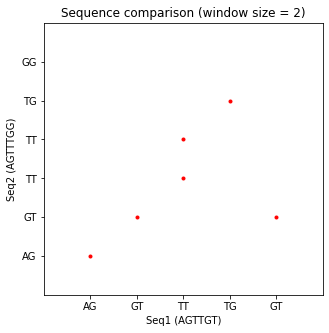

In [5]:
%matplotlib inline
# Plotting
pl.figure(figsize=[5, 5])
pl.plot(x,y, ".r")
pl.title("Sequence comparison (window size = 2)")
pl.xlabel("Seq1 (AGTTGT)")
pl.xticks(range(len(labels_x)), labels_x)
pl.xlim(left=-1, right=len(labels_x))
pl.ylabel("Seq2 (AGTTTGG)")
pl.yticks(range(len(labels_y)), labels_y)
pl.ylim(bottom=-1, top=len(labels_y))
pl.gca().xaxis.tick_bottom()
pl.gca().xaxis.set_label_position("bottom")
pl.show()

**What information can you read out of this specific plot?**

As for this particular plot, one can see the significant number of matches (dots) between the two sequences (diagonal). The diagonal has a break that points out to an indel. After the break the diagonal continues what reflects a subsequent match (G in sequence 1 and G in sequence 2).

seq_1  AGTT_GT

seq_2  AGTTTGG

**Which information can be generally read out of a dotplot?**

Here are just some example of such information pieces: similar regions, repeated sequences, sequence rearrangements, gene order, RNA structures etc.).

## Score and Alignment

**You have this alignment:**

K A T Z E N 

K O T Z E _

**Calculate the evaluation according to the following scoring scheme:**
**Match := 0, Mismatch := 1, Gap := 2.**

In [6]:
# Matches: 4, Mismatches: 1, gaps: 1
score = 0*4 + 1*1 + 2*1
print(f"Evaluation according to the scheme is: {score}")

Evaluation according to the scheme is: 3


**Is this scheme one over the distance or the score?**

This is a distance scheme.

**Please tell in your answer when a scheme about distance and when a scheme about score is optimal.**  

For an optimal alignment, a distance scheme is considered optimal when a distance is minimal, whereas in the case of a score scheme when a score is maximal.

## Optimal Alignments

**You have the following sequences:**

**S1 := „KLAUS“ and S2 := „FAGUN“**

**Calculate the optimal local alignment and the score with an optimal algorithm.** 

**Use the following costs:**

**Match := 5, Mismatch :=-2 und Gap := -3.**                                            

In [3]:
# Optimal local alignment is AGU/A_U 
#  FAGUN
# KLA_US

# Matches: 2, Mismatches: 0, Gaps: 1
score = 5*2 + (-2)*0 + (-3)*1
print(f"The score with an optimal local algorithm is: {score}")

The score with an optimal local algorithm is: 7


## Multiple Sequence Alignmens

**What is calculated with the ClustalW algorithm**

The algorithm is aimed at calculating the best match (under a given approach) for the selected multiple sequences, and lines them up so that the identities, similarities and differences can be seen.

**Please state the three phases of this algorithm.**

ClustalW consists of three phases: calculating the distance matrix (construction of all pairwise alignments), development of the guidedtree (joining neighbours), and progressive alignment

**Define the concept of heuristics in bioinformatics.**

Heuristics as a concept is an approach to problem-solving that uses a practical method or various shortcuts in order to produce solutions that may not be optimal but are sufficient given a limited timeframe or deadline.

## Homology

**Explain the terms homology, paralogy and orthology in relation to biological sequences.**

Sequence homology in relation to biological sequences is defined in terms of shared ancestry in the evolutionary history of life. 

Orthology characterizes homologues biological sequences of different organisms that arose from a single ancestral sequence via speciation.

Paralogy characterizes homologoues biological sequences, if these sequences are related via duplication events.

## PAM

**The entries in a PAM matrix can be negative, positive or zero. What is the meaning of this?**

A positive entry (score) in a PAM matrix implies a high probability (a high chance of event occurrence) of mutating one amino acid into another.
A negative entry (score) in a PAM matrix implies a low probability (a low chance of event occurrence) of mutating one amino acid into another.
A zero entry (score of zero) in a PAM matrix implies that the probability of mutating one amino acid into another was as expected by chance.

**You look at two sequences with an identity of 60%. You want to make an alignment with the help of a PAM Matrix – Which matrix would you use? Please explain your answer.**

I would use an interpolation to define such a matrix, using the graph presented in the corresponding lecture. My estimation is a PAM60 or so. At PAM60 there are 40% differences per 100 residues.


## PARSEN            


**State the basic algorithm for parsing files.**

A basic approach can be summarized as follows:

- get acquainted with a file format

- read a file line by line

- produce of an array of lines

- loop over the created array

- separate lines based on distinct formatting features

- based on separation, extract only needed pieces of information


**You have the file down below. Is this file formatted according to Fasta standards? Please explain your answer.**

\>ProteinName1

SYFPHEITI 

\>ProteinName2

YFPHEIEETI

ProteinName3

SYFPHPIDTKEVTI

In FASTA format the line before the sequence (nucleotide or peptide), called the FASTA definition line, must begin with a carat (">"), followed by a unique SeqID (sequence identifier).
As FASTA definition line for the ProteinName3 does not begin with a catat sign, this file as a whole cannot satisfy the Fasta formatting standards.